<a href="https://colab.research.google.com/github/fregonalab/investimentos_imoveis/blob/master/projeto_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Investimentos em Real Estate - Data-driven Decision
----------------------------------------------------
*Luiz Guilherme Gomes Fregona*

*01/05/2022*

## 1.   Introdução

*O mercado imobiliário é cíclico e muitas vezes, subjetivo. Por conta disso, inúmeras oportunidades de ganho de capital normalmente estão disponíveis no mercado. A utilização de grandes conjuntos de dados como suporte no processo decisório na compra imobiliária vem se tornando fundamental, e muitas vezes, indispensável. O presente trabalho busca auxiliar no processo decisório da Roof Imóveis, empresa especializada na aquisição de imóveis. Os dados utilizados na análise são open source e podem ser encontrados no seguinte website: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction*

## 2.   Objetivos

*Indicar cinco imóveis que a Roof Imóveis deveria investir no Condado de County, nos Estados Unidos, e 5 imóveis que ela não deveria de jeito nenhum.Todas as conclusões devem ter justificativas baseadas em dados.*

## 3.   Metodologia

*A metodologia utilizada nesse trabalho engloba as etapas de importação e instalação das bibliotecas, descrisão dos dados, limpesa dos dados, feature engeneering, e exploração dos dados.*

## 4. Instalação e/ou upload das bibliotecas




In [3]:
#Instalando bibliotecas
try:
  import numpy as np
except ImportError:
  prosseguir = input("Você não possui o pacote numpy! Você deseja instalá-lo? (s/n)")
  if prosseguir == 's':
    %pip install numpy
    import numpy as np
  else:
    sys.exit("Tente novamente!")

try:
  import matplotlib.pyplot as plt
except ImportError:
  prosseguir = input("Você não possui o pacote matplotlib! Você deseja instalá-lo? (s/n)")
  if prosseguir == 's':
    %pip install matplotlib
    import matplotlib.pyplot as plt
  else:
    sys.exit("Tente novamente!")    

try:
  import seaborn as sns
except ImportError:
  prosseguir = input("Você não possui o pacote seaborn! Você deseja instalá-lo? (s/n)")
  if prosseguir == 's':
    %pip install seaborn
    import seaborn as sns
  else:
    sys.exit("Tente novamente!")

try:
  import warnings
except ImportError:
  prosseguir = input("Você não possui o pacote warnings! Você deseja instalá-lo? (s/n)")
  if prosseguir == 's':
    %pip install warnings
    import warnings
  else:
    sys.exit("Tente novamente!")

try:
  import pandas as pd
except ImportError:
  prosseguir = input("Você não possui o pacote pandas! Você deseja instalá-lo? (s/n)")
  if prosseguir == 's':
    %pip install pandas
    import pandas as pd
  else:
    sys.exit("Tente novamente!")

try:
  import scipy.stats as stats
except ImportError:
  prosseguir = input("Você não possui o pacote scipy! Você deseja instalá-lo? (s/n)")
  if prosseguir == 's':
    %pip install scipy
    import scipy.stats as stats
  else:
    sys.exit("Tente novamente!")

try:
  import pprint
except ImportError:
  prosseguir = input("Você não possui o pacote pprint! Você deseja instalá-lo? (s/n)")
  if prosseguir == 's':
    %pip install pprint
    import pprint
  else:
    sys.exit("Tente novamente!")

try:
  from uszipcode import SearchEngine
except ImportError:
  prosseguir = input("Você não possui o pacote uszipcode! Você deseja instalá-lo? (s/n)")
  if prosseguir == 's':
    %pip install uszipcode
    from uszipcode import SearchEngine
  else:
    sys.exit("Tente novamente!")

Você não possui o pacote uszipcode! Você deseja instalá-lo? (s/n)s
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 47.1 MB/s 
     |████████████████████████████████| 76 kB 3.7 MB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 
     |████████████████████████████████| 42 kB 838 kB/s 


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## 5. Configuração do ambiente

In [4]:
#Configurando casas decimais de outputs
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
#Configurando número máximo de colunas apresentadas nos outputs
pd.set_option('display.max_columns', 50)

In [6]:
#Configurando warnings para 'ignore'
warnings.filterwarnings('ignore')

## 5. Descrisão dos dados

In [7]:
# Importando o dataset
df = pd.read_csv('kc_house_data.csv') #Fazer o upload do arquivo kc_house_data.csv para dentro do colab antes.

In [6]:
#Apresentando o formato do banco de dados
df.shape

(21613, 21)

In [ ]:
#Amostra do banco de dados
df.head()

In [ ]:
#Descrição das variáveis
df.info()

In [ ]:
#Apresentação da distribuição dos dados e de alguns parâmetros estatísticos descritivos
df.describe()

A partir dos resultados acima percebemos que nosso conjunto de dados não possui dados faltantes, e todas as nossas variáveis são númericas, exceto a feature 'date'. Além disso, com um olhar mais apurado tambem percebemos que temos tanto variáveis continuas como discretas ('floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', e 'zipcode').

Além disso, a variação nos preços dos imóveis de 75.000 doláres a 7.700.0000 doláres e a área dos imóveis indo de 290 ft2 até 13540 ft2 nos mostra que existem imóveis de baixo e alto padrão no banco de dados. 

Abaixo resumo das variáveis do banco de dados:

Variáveis         | Explicação
:-----------------|:-------------:
id                | Identificados único do imóvel 
date              | Data da Venda
price             | Preço de Venda
bedrooms          | Número de quartos
bathrooms         | Número de banheiros
sqrt_liv          | Tamanho de área habitável em ft2
sqrt_lot          | Tamanho do terreno em ft2
floors            | Número de andares
waterfront        | Indicativo se o imóvel é beira-mar
view              | Grau de quão belo é a vista do imóvel (0 a 4)
condition         | Condição da casa (0 a 5)
grade             | Classificação por qualidade de material utilizado na construção 
sqft_above        | Área acima do solo em ft2
sqft_basement     | Área abaixo do solo em ft2
yr_built          | Ano de construção
yr_renov          | Ano de restauração, caso contrário, 0
zipcode           | Zip Code 5 - Similar ao CEP
lat               | Latitude
long              | Longitude
squft_liv15       | Média da área habitável dos 15 imóveis mais próximos, em ft
squft_lot15       | Média da área do lote dos 15 imóveis mais próximos, em ft

## 7. Limpesa de Dados

Como observado anteriormente, nosso conjunto de dados não possui dados faltantes, e devido a importancia de outliers no mercado imobiliario (maiores potenciais de valorização e desvalorização) tambem não será necessário a retirada dos mesmos. Portanto, a etapa de limpesa de dados no presente trabalho não será realizada.

## 8. Feature Engeneering

Nessa etapa produzimos duas variáveis novas importantes para a nossa análise. A variável preço por ft2, pois facilitaria uma análise relativa dos preços entre imóveis de diferentes tamanho, e variável 'district', utilizando a feature original zipcode. Além de algumas alterações pontuais, por exemplo, com as datas, pois verificamos que as datas não estão de acordo com o padrão que desejamos, ano/mês/dia. 

In [8]:
#Alterando a apresentação das datas
datas = []
for data in df["date"]:
  datas.append(int(data[0:8]))  
df["date"] = datas

Como primeira abordagem de agrupamento, fizemos uma redução dos dados segundo a sua localização na cidade. Para isso retiramos os id's duplicados (df_id_unique), que significam que uma casa foi vendidida mais de uma vez, e mantivemos os preços mais atuais dos imóveis.

In [9]:
#Eliminando valores duplicados de imóveis
df = df.sort_values(by = 'date', ascending = False)
df_id_unique = df.drop_duplicates(subset = ["id"], keep = "first")

Com o intuito de verificarmos o comportamento dos preços de venda segundo sua localização, fizemos um gráfico de disperção desses valores mostrado na figura Dispersão geográfica das casas. Aqui fica claro como a localização dos empreendimentos tem uma forte influencia no preço dos imóveis.

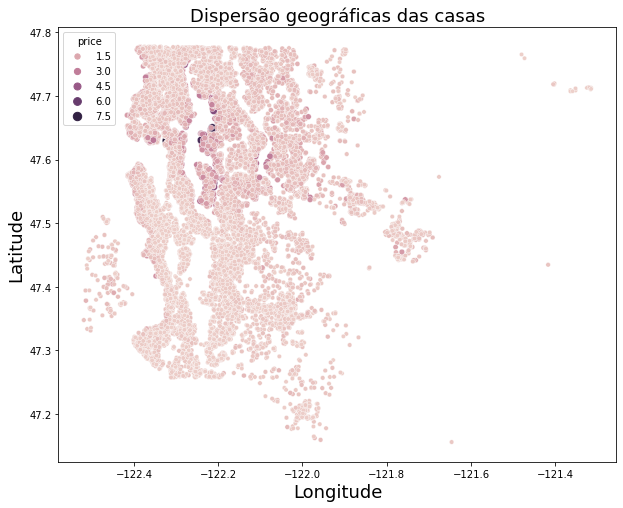

In [9]:
#Plotando o preço em função da latitude e longitude
from numpy.core.fromnumeric import size
plt.figure(figsize = [10,8])
sns.scatterplot(data=df_id_unique, x="long", y="lat", hue="price", size='price')
plt.xlabel('Longitude',Fontsize = 18)
plt.ylabel('Latitude',Fontsize = 18)
plt.title('Dispersão geográficas das casas',Fontsize = 18)
plt.savefig('Dispersão geográficas', dpi=300)

Sabemos que a localização dos imóveis é muito importante no preço do mesmo, assim como o bairro o qual o imóvel está localizado. A ideia da linha de código a seguir é adicionar uma variável "bairro" ao banco de dados conforme o zip code.

In [10]:
#Nomeando os bairros conforme o zipcode
n_zip = []
engine = SearchEngine()
for zip in df_id_unique["zipcode"]:
  ziip = engine.by_zipcode(zip)
  lugar = ziip.common_city_list
  n_zip.append(lugar[0])

#Adicionando a coluna 'district' com o nome dos bairros ao nosso dataset principal
df_id_unique.loc[:,'district'] = n_zip
df_id_unique

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,district
16594,9106000005,20150527,1310000.00,4,2.25,3750,5000,2.00,0,0,5,8,2440,1310,1924,0,98115,47.67,-122.30,2170,4590,Seattle
13053,5101400871,20150524,445500.00,2,1.75,1390,6670,1.00,0,0,3,6,720,670,1941,0,98115,47.69,-122.31,920,6380,Seattle
5637,7923600250,20150515,450000.00,5,2.00,1870,7344,1.50,0,0,3,7,1870,0,1960,0,98007,47.60,-122.14,1870,7650,Bellevue
928,8730000270,20150514,359000.00,2,2.75,1370,1140,2.00,0,0,3,8,1080,290,2009,0,98133,47.71,-122.34,1370,1090,Seattle
6197,9178601660,20150514,1695000.00,5,3.00,3320,5354,2.00,0,0,3,9,3320,0,2004,0,98103,47.65,-122.33,2330,4040,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20559,3438501320,20140502,295000.00,2,2.50,1630,1368,2.00,0,0,3,7,1280,350,2009,0,98106,47.55,-122.36,1590,2306,Seattle
7323,2202500290,20140502,435000.00,4,1.00,1450,8800,1.00,0,0,4,7,1450,0,1954,0,98006,47.57,-122.14,1260,8942,Bellevue
12366,587550340,20140502,604000.00,3,2.50,3240,33151,2.00,0,2,3,10,3240,0,1995,0,98023,47.33,-122.38,4050,24967,Federal Way
9587,1024069009,20140502,675000.00,5,2.50,2820,67518,2.00,0,0,3,8,2820,0,1979,0,98029,47.58,-122.03,2820,48351,Issaquah


In [ ]:
#Número de bairros diferentes produzidos
district_unique = df_id_unique['district'].unique()
len(district_unique)

In [ ]:
#Número de imóveis por bairro produzidos
teste = df_id_unique.groupby(by='district').count()
teste["id"]

Observamos que alguns bairros possuem poucos imóveis para a análises, e podem ao final produzir dados enviesados.

## 9. Exploração dos dados

### 9.1 Relação entre variáveis numéricas contínuas

A associação e o relacionamento entre variáveis numéricas normalmente é mensurado a partir da utilizações de correlações. Nesse trabalho, utilizamos a correlação de Pearson. Nota-se pelo gráfico abaixo que as variáveis numéricas contínuas 'sqrt_above' e 'sqrt_living' possuem as maiores correlações com o preço. 

In [ ]:
correlacao = df.iloc[:,[2,3,4,5,6,12,13,17,18,19,20]].corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlacao, annot=True)
plt.show()
plt.savefig('mapa_calor_correlação', dpi=1200)

### 9.1.2 Relação entre variáveis numéricas discretas

A correlação de Pearson é uma maneira interessante de estudar a correlação linear entre variáveis numéricas continuas, porém outros tipos de correlações entre as variáveis podem tambem existir. Uma observação importante é que a análise entre variáveis numéricas continuas e discretas devem ser feita de maneiras diferentes. Quando discretas, normamente, se realiza um teste estatístico. Os mais comuns são o t-test e o anova test.

As variáveis que queremos testar a associação são as variáveis *'waterfront'*, *'condition'*, *'view'*, e *'grade'* com a variável transformada *'price_per_m2'*. A feature *'price_per_ft2'* é o resultado da divisão entre *'price'* e *'sqrt_living'*.

In [11]:
df_id_unique['price_per_ft2'] = df_id_unique['price']/df_id_unique['sqft_living']

In [ ]:
#Anova Test
results = {}
bairros = df_id_unique['district'].unique()

#Segregar banco de dados conforme variável 'bairro'
for bairro in bairros:
  mask = df_id_unique['district'] == bairro
  df_bairro = df_id_unique[mask]

  #Definição das variáveis discretas
  var_categoricas = ['waterfront','condition', 'view','grade']
  results_anova = {}

  for variavel in var_categoricas:
    #Array com grupos das variaveis
    grupos = df_bairro[variavel].unique()

    #Calculo do p_value do anova test para cada variavel
    p_value = stats.f_oneway(*([df_bairro['price_per_ft2'][df_bairro[variavel] == grupo] for grupo in grupos]))[1]
    results_anova[str(variavel)] = p_value
  
  #Adicionar resultados ao dicionario 'results'
  results[str(bairro)] = results_anova

#Printar valores de uma maneira mais interessante
pp = pprint.PrettyPrinter()
pp.pprint(results)

Bairro            | Variáveis Discreta com forte associação com o preço
:-----------------|:-------------
Auburn            | grade
Bellevue          | grade, waterfront, view
Black Diamond     | grade
Brothel           | grade
Carnation         | grade, condition
Duvall            | grade
Enumclaw          | grade, condition
Fall City         | grade, condition
Federal Way       | grade, condition, view, waterfront
Issaquah          | grade, condition, view, waterfront
Kent              | grade, condition, view
Kenmore           | view, waterfront
Kirkland          | grade, condition, view, waterfront
Maple Valley      | grade, condition, view   
Mercer Island     | view, grade, waterfront
Medina            | condition
North Bend        | grade
Redmond           | grade, condition, view, waterfront
Renton            | grade, condition, view, waterfront
Sammamish         | grade, condition, view, waterfront
Snoqualmie        | grade
Seattle           | grade, condition, view, waterfront
Vashon            | grade, waterfront
Woodinville       | grade, condition

Quando olhamos para a feature 'price_per_ft2' (preço das propriedades por pés quadrados), notamos uma forte correlação entre esta e a feature 'grade' (classificação pela qualidade da construção quanto a qualidade do material e mão de obra empregados), sendo uma correlação já esperada. Isso se mostrou para praticamente todos os bairros, exceto 'Medina' e 'Kenmore'. O teste anova mostra claramente esta correlação. Adicionalmente, existe ainda uma correlação na variação dos preços com as features, em ordem decrescente de relevância, 'condition', 'view' e 'waterfront'. Estes resultados podem ser vistos na tabela do bloco anterior. 

In [17]:
#Calculando a mediana dos valores agrupados por 'bairros','grade','condition','view','waterfront'
grouped_df = df_id_unique.groupby(['district','grade','condition','view','waterfront'], as_index=False)['price_per_ft2'].median()

#Contando o número de imóveis utilizados na estimação das medianas
grouped_df['n_imovel'] = df_id_unique.groupby(['district','grade','condition','view','waterfront'], as_index=False)['id'].count().iloc[:, 5]

#Visualizando os grupos com maior número de imóveis utilizados para estimar a mediana
grouped_df.sort_values('n_imovel', ascending=False).tail(n=15)

,district,grade,condition,view,waterfront,price_per_ft2,n_imovel
639,Renton,5,2,0,0,91.84,1
635,Redmond,12,4,0,0,330.42,1
616,Redmond,8,5,4,1,474.14,1
632,Redmond,11,5,0,0,239.73,1
630,Redmond,11,3,3,0,415.53,1
248,Fall City,9,3,3,0,242.93,1
628,Redmond,10,4,4,1,604.98,1
625,Redmond,10,3,2,1,529.95,1
623,Redmond,10,3,1,0,359.34,1
621,Redmond,9,4,2,0,298.80,1


Observamos que muitos agrupamentos possuem muito poucos dados. Isso aumenta o erro na estimativa da variavel 'price_per_ft2' em cada grupo, e muitas vezes a inviabiliza. Por conta disso, vamos atualizar nosso banco de dados original, filtrar os grupos com um número de imóveis abaixo de 100 (maior confiabilidade nos resultados estimados da mediana), e comparar com o preço por ft2 dos imóveis. Isso nos dará os imóveis supervalorizados e os negligenciados, ou seja, o objeto do nosso estudo.

In [18]:
#Adiconando a coluna 'preço médio' 
df_id_unique['preco_medio'] = df_id_unique.groupby(['district','grade','condition','view','waterfront'])['price_per_ft2'].transform('median')

#Adiconando a coluna com o número de dados utilizados para estimar a mediana
df_id_unique['n_imovel'] = df_id_unique.groupby(['district','grade','condition','view','waterfront'], as_index=False).transform('count').iloc[:, 0]

#Filtrando resultados com menos de 100 imóveis
mask = df_id_unique['n_imovel'] >= 100
df_filtrado = df_id_unique[mask].loc[:, ['id','price_per_ft2','yr_built','preco_medio','n_imovel']]

#Adicionando coluna do Potencial de valorização
df_filtrado['potencial_valorizacao'] = (df_filtrado['preco_medio']/df_filtrado['price_per_ft2'] - 1)*100

#Visualizando 5 imóveis com maior potencial de valorização
df_filtrado.sort_values(by='potencial_valorizacao', ascending=False).head()

,id,price_per_ft2,yr_built,preco_medio,n_imovel,potencial_valorizacao
21186,7896300592,89.53,2007,294.10,1396,228.50
8200,5379804470,88.54,1966,290.42,1069,228.00
12185,7686202065,88.54,1962,290.42,1069,228.00
13207,216500040,94.53,1964,290.42,1069,207.24
12745,7247000035,96.33,1950,294.10,1396,205.30


In [19]:
#Visualizando 5 imóveis com menor potencial de valorização
df_filtrado.sort_values(by='potencial_valorizacao', ascending=True).head()

,id,price_per_ft2,yr_built,preco_medio,n_imovel,potencial_valorizacao
19336,6021500970,810.14,1940,261.46,2381,-67.73
4018,622059031,493.25,1923,159.87,262,-67.59
9294,1257201095,779.25,1908,261.46,2381,-66.45
4181,7986400945,767.33,1913,261.46,2381,-65.93
7530,7228501745,766.39,1903,261.46,2381,-65.88


## 10. Conclusão

A partir da análise minuciosa dos dados, nós recomendamos os imóveis de ID 7896300592, 5379804470, 7686202065, 216500040, 7247000035 para compra, e aconselhamos a empresa a evitar a compra dos imóveis de ID 6021500970, 622059031, 1257201095, 7986400945, e 7228501745.

## 11. Trabalhos Futuros

Agrupando os imóveis na maneira proposta produziu uma concentração de imóveis mais antigos em nossas recomendações. Dessa maneira, recomendamos em trabalhos futuros o estudo aprofundado das variáveis 'yr_built' e 'yr_renovated' a partir de testes anova e testes post-hoc, como o tukey test. Isso nos mostraria se essas variáveis possuem alguma associação com a variável 'price_per_ft2', e como deveriamos agrupa-las de modo a diminuir o número de categorias nessas features. Além disso, aconselhamos o agrupamento seletivo das variáveis por bairros, pois em alguns bairros as features 'view', 'condition' e 'waterfront' não apresentaram associação com a feature 'price_per_ft2'.

## 12. Dataset final

In [21]:
from google.colab import files
df_id_unique.to_csv('kc_house_data_transformed.csv') 
files.download('kc_house_data_transformed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>